## MNIST dataset

In [18]:
# Imports

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import keras
import keras.layers
import keras.objectives
import keras.metrics
import keras.models

from tensorflow.examples.tutorials.mnist import input_data

In [19]:
# Load the MNIST data
mnist_data = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz


Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [20]:
# How are the labels encoded? They are one-hot encoded
print (mnist_data.train.labels[:10])
train_classes = np.array([label.argmax() for label in mnist_data.train.labels])
print (train_classes[:10])

[[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]
 [ 0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.  1.  0.]]
[7 3 4 6 1 8 1 0 9 8]


In [21]:
# Size of our dataset
print (len(mnist_data.train.labels))
print (len(mnist_data.test.labels))
print (len(mnist_data.validation.labels))

55000
10000
5000


In [22]:
# We know that MNIST images are 28 pixels in each dimension.
img_size = 28
# Images are stored in one-dimensional arrays of this length.
img_size_flat = img_size * img_size
# Tuple with height and width of images used to reshape arrays.
img_shape = (img_size, img_size)
# Number of classes, one class for each of 10 digits.
num_classes = 10

def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(img_shape), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

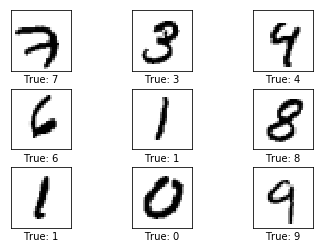

In [23]:
# Get the first images from the test-set.
images = mnist_data.train.images[:9]

# Get the true classes for those images.
cls_true = train_classes[:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

## Keras training model

In [36]:
# this placeholder will contain our input digits, as flat vectors
img = tf.placeholder(tf.float32, shape=(None, 784))

In [37]:
model = keras.Sequential()
model.add(keras.layers.Dense(128, activation='relu', input_dim=784))
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

preds = model(img)

In [38]:
# placeholder for the one hot label
labels = tf.placeholder(tf.float32, shape=(None, 10))

In [41]:
loss = tf.reduce_mean(keras.objectives.categorical_crossentropy(labels, preds))

In [42]:
# Uset the gradient descent optimizer
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

In [44]:
# Run tensorflow for training
sess = tf.Session()
keras.backend.set_session(sess)

# Initialize all variables
init_op = tf.global_variables_initializer()
sess.run(init_op)

# Run training loop
with sess.as_default():
    for i in range(1000):
        batch = mnist_data.train.next_batch(50)
        train_step.run(feed_dict={img: batch[0],
                                  labels: batch[1]})        

print('done')

done


In [45]:
# Save the current model to disk

model.save_weights('./concepts/tensorflow-tutorial/nmist.h5')

In [46]:
# Check the accuracy of the model
acc_value = keras.metrics.categorical_accuracy(labels, preds)
with sess.as_default():
    test_ans = acc_value.eval(feed_dict={img: mnist_data.test.images,
                                    labels: mnist_data.test.labels})
    
print ( sum(test_ans)/len(test_ans) * 100)

96.23


## Inference

In [33]:
# Get 9 images to get the inference for
inf_images = mnist_data.test.images[:9]

with sess.as_default():    
    inf_labels = sess.run(preds, feed_dict={img: inf_images})
    
print (inf_labels)

[[  2.38076100e-04   6.91744617e-06   1.11303013e-03   2.04390031e-04
    1.69037667e-05   1.31572931e-04   1.91618119e-06   9.95655060e-01
    1.26041969e-05   2.61953403e-03]
 [  2.36290944e-04   1.27589128e-05   9.95261908e-01   2.88117790e-05
    1.27379587e-06   1.34992006e-03   2.46094377e-03   1.54612262e-05
    6.31449977e-04   1.13730869e-06]
 [  9.02014071e-05   9.83654201e-01   5.82952285e-03   9.69499000e-04
    8.13710154e-04   1.28391327e-03   1.05475646e-03   3.15066497e-03
    2.23599002e-03   9.17547441e-04]
 [  9.99815881e-01   2.19547118e-08   1.82940148e-05   4.69201183e-07
    1.88639845e-07   8.70542499e-05   7.61891988e-06   6.86829881e-05
    1.11315296e-06   8.67308131e-07]
 [  1.41654378e-02   1.74191466e-03   2.96071544e-02   1.86129299e-03
    6.77090824e-01   4.79337992e-03   3.21070366e-02   1.52573008e-02
    1.32944621e-02   2.10081220e-01]
 [  5.93234790e-06   9.97149646e-01   1.01031177e-03   1.52196575e-04
    1.10805115e-04   8.68495044e-05   4.35013

[7 2 1 0 4 1 4 9 6]


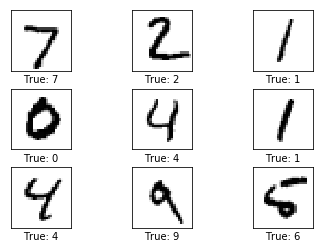

In [34]:
# Get the highest probability labels as the predicted digit 
pred_classes = np.array([label.argmax() for label in inf_labels])
print(pred_classes)

# Plot the images and labels using our helper-function above.
plot_images(images=inf_images, cls_true=pred_classes)